In [84]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import operator
import math
from collections import Counter
%matplotlib inline

In [166]:
# get all data
medoid_dict={}
cluster_elements=open("../../data_dir/"+dataset+"/base_with_numbers/filtered_data/hash_jaccard/"
                      +str(source_clusters)+"_clusters/fullSource_cluster_elements.txt")
for line in cluster_elements:
    line=line.split(";")[1]
    [medoid, pair, _]=line.split("<=====>")
    [source, target]=pair.split("=")
    if medoid in medoid_dict:
        medoid_dict[medoid].append(source)
    else:
        medoid_dict[medoid]=[source]

In [210]:
def data_visualization(source_cl, target_cl, dataset):
    source_clusters=source_cl
    target_clusters=target_cl
    dataset=dataset
    folder="hash_jaccard/"+str(source_clusters)+"-"+str(target_clusters)+"_filtering/"
    source_cluster_entropies=open(
        os.path.join(
            "../../data_dir/"+dataset+"/base_with_numbers/filtered_data/"+folder+"fullSource_cluster_entropies.txt"))
    target_cluster_entropies=open(
        os.path.join(
            "../../data_dir/"+dataset+"/base_with_numbers/filtered_data/"+folder+"fullTarget_cluster_entropies.txt"))

    def visualize(file, tag, plt_name1, plt_name2):
        sentences=[]
        entropies_long=[]
        entropies=[]
        sentence_lengths=[]
        cl_sizes=[]
        for line in file:
            [sentence, entropy, cl_size]=line.split(";")
            entropy=float(entropy)
            #if entropy>0:
            #    entropy=entropy/math.log(int(cl_size), 2)
            sentences.append([sentence, entropy])
            sentence_lengths.append(len(sentence.split()))
            entropies_long.extend([entropy]*int(cl_size))
            entropies.append(entropy)
            cl_sizes.append(int(cl_size))
        
        plt_name1.plot(sorted(entropies_long))
        plt_name1.set_title(tag+" entropies")
        plt_name2.scatter(np.array(cl_sizes), np.array(entropies))
        plt_name2.set_title(tag+" cluster sizes with respect to entropies")
        #plt_name3.scatter(np.array(sentence_lengths), np.array(cl_sizes))
        #plt_name3.set_title(tag+" sentence lengths with respect to entropies")
        
        return sentences
        

    plt.close('all')
    fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(12,9)
    source_sentences=visualize(source_cluster_entropies, "Source", ax1, ax3)
    target_sentences=visualize(target_cluster_entropies, "Target", ax2, ax4)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
    source_cluster_entropies.close()
    target_cluster_entropies.close()
    
    # show the most common
    return source_sentences, target_sentences


In [199]:
medoid=source_medoids[200]
print(medoid)
print("\n".join(medoid_dict[medoid[0]]))

[' ah  i see  .  the goods description is totally different from what you are expecting  right  ?  ', 1.0000000000000002]
 is that different from our school 's english course  ?  
 technical barriers are set for imported goods  .  
 no  you must also obtain a statement from the shipping agent certifying that the goods were actually loaded on their vessel for shipment  .  
 we expect the goods to be on the market before the end of december to catch up with the spring festival sales  .  
 an understanding of the basic workings of a company and the services or goods it provides is essential  .  do you have that  ?  
 ah  i see  .  the goods description is totally different from what you are expecting  right  ?  
 the goods will be inspected by the china import  export commodity inspection bureau  .  it will then issue certificate of quality and a certificate of weight  .  these will be taken as final and biding  .  


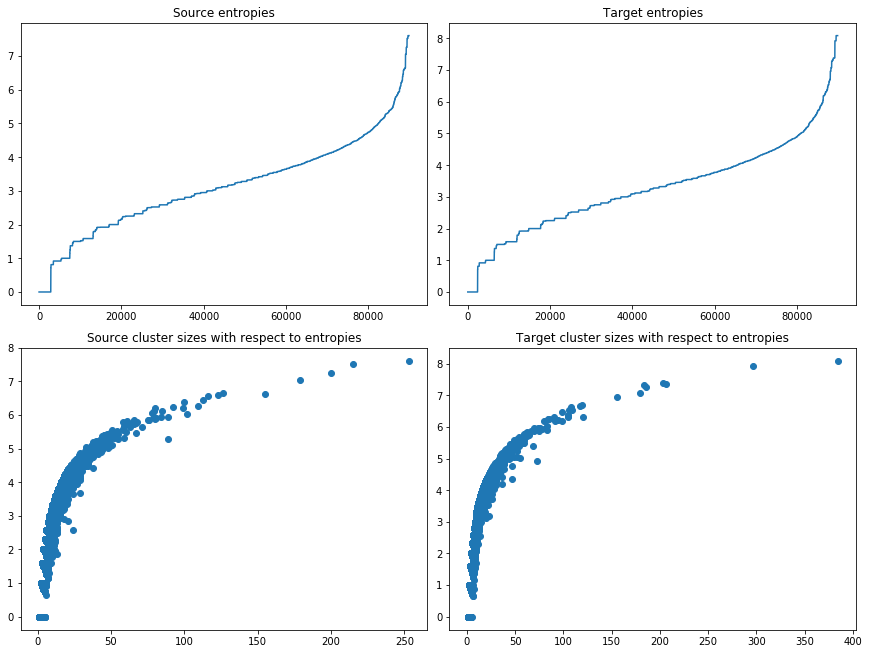

In [212]:
source_clusters=12800
target_clusters=12800
dataset="DailyDialog"
source_medoids, target_medoids=data_visualization(source_clusters, target_clusters, dataset)
source_medoids=sorted(source_medoids, key=operator.itemgetter(1), reverse=True)

